c

In [455]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder

import joblib  

In [456]:
df = pd.read_csv("train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Explore Data

In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [458]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Cleaning

## Check the Missing Values

In [459]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Preprocess the Data

## Fill the Missing Values in `LoanAmount` and `Credit_History` by the **Mean** and **Median** of the respective varibales.

In [460]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [461]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [462]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

## Drop all the missing values remaining

In [463]:
df.dropna(inplace=True)

In [464]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

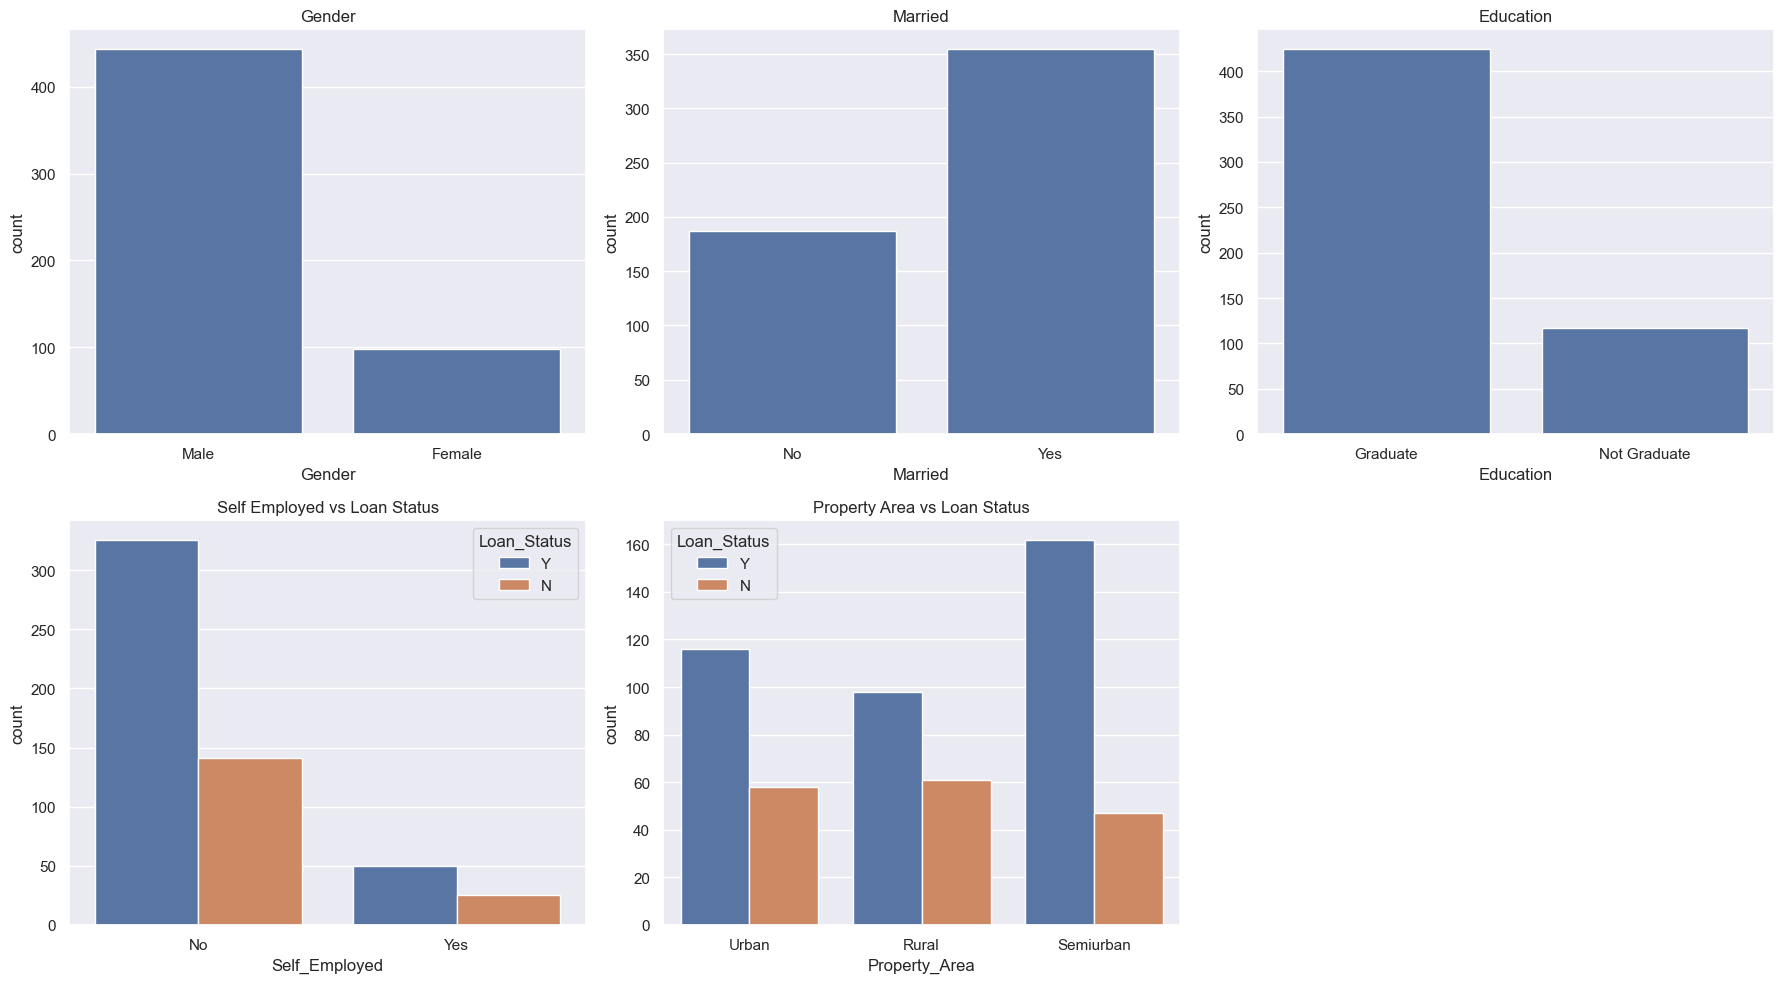

In [465]:
# Reset Seaborn settings to default
sns.set_theme()  # resets font scale and other settings

# Create a new figure with appropriate size
plt.figure(figsize=(18, 10))

# Gender plot
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Gender')
plt.title('Gender')

# Married plot
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Married')
plt.title('Married')

# Education plot
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='Education')
plt.title('Education')

# Self_Employed vs Loan Status
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='Self_Employed', hue='Loan_Status')
plt.title('Self Employed vs Loan Status')

# Property_Area vs Loan Status
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='Property_Area', hue='Loan_Status')
plt.title('Property Area vs Loan Status')

# Automatically adjust spacing
plt.tight_layout()
plt.show()


#  Encoding categorical variables

## 1-Ordinal Encoding

In [466]:
load_ids = df['Loan_ID']

In [467]:
X=df.drop(columns=['Loan_ID','Loan_Status'], axis=1)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban


In [468]:
y = df['Loan_Status']
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 542, dtype: object

# Spliting the data into Train and Test Set

In [469]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

In [470]:
# Encode input features with OrdinalEncoder
categorical_cols = X_train.select_dtypes(include='object').columns

# Initialize encoder
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit on training data
X_train[categorical_cols] = ordinal_encoder.fit_transform(X_train[categorical_cols])

# Transform test data using same encoder
X_test[categorical_cols] = ordinal_encoder.transform(X_test[categorical_cols])

In [471]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
438,1.0,0.0,0.0,0.0,1.0,10416,0.0,187.000000,360.0,0.0,2.0
369,1.0,1.0,0.0,0.0,0.0,19730,5266.0,570.000000,360.0,1.0,0.0
395,1.0,1.0,2.0,0.0,0.0,3276,484.0,135.000000,360.0,1.0,1.0
457,1.0,1.0,0.0,0.0,0.0,3708,2569.0,173.000000,360.0,1.0,2.0
523,1.0,1.0,2.0,0.0,1.0,7948,7166.0,480.000000,360.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
81,1.0,1.0,1.0,0.0,1.0,2395,0.0,146.412162,360.0,1.0,1.0
124,1.0,1.0,0.0,1.0,0.0,4300,2014.0,194.000000,360.0,1.0,0.0
306,0.0,0.0,0.0,0.0,0.0,3762,1666.0,135.000000,360.0,1.0,0.0
495,0.0,1.0,1.0,0.0,0.0,3326,913.0,105.000000,84.0,1.0,1.0


# 2-Label Encoder

In [472]:
# Encode target with LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y_train
y_train = label_encoder.fit_transform(y_train)

# Transform y_test
y_test = label_encoder.transform(y_test)

In [473]:
y_train

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [474]:
# Convert y_train to DataFrame
y_train_df = pd.DataFrame(y_train, columns=['Loan_Status'])
y_train_df.head()

,Loan_Status
0,0
1,0
2,1
3,0
4,1


In [475]:
# Convert y_test to DataFrame
y_test_df = pd.DataFrame(y_test, columns=['Loan_Status'])
y_test_df.head()

,Loan_Status
0,0
1,0
2,1
3,1
4,1


# StandardScaler

In [476]:
scaler = StandardScaler()

In [477]:
# Fit and transform on training features
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train_scaled,columns=X_train.columns)
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.464482,-1.406617,-0.769545,-0.517182,2.327098,1.059800,-0.758021,0.448133,0.245276,-2.565505,1.231898
1,0.464482,0.710926,-0.769545,-0.517182,-0.429720,3.008687,1.895311,4.933356,0.245276,0.389787,-1.292433
2,0.464482,0.710926,1.248696,-0.517182,-0.429720,-0.434193,-0.514152,-0.160827,0.245276,0.389787,-0.030268
3,0.464482,0.710926,-0.769545,-0.517182,-0.429720,-0.343800,0.536398,0.284182,0.245276,0.389787,1.231898
4,0.464482,0.710926,1.248696,-0.517182,2.327098,0.543389,2.852647,3.879387,0.245276,0.389787,-1.292433


In [478]:
# Transform on testing features
X_test_scaled = scaler.transform(X_test)
X_test =  pd.DataFrame(data=X_test_scaled,columns=X_test.columns, index=X_test.index)
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
409,0.464482,0.710926,2.257816,-0.517182,-0.42972,15.828989,-0.758021,2.474095,0.245276,-2.565505,-1.292433
83,0.464482,0.710926,-0.769545,-0.517182,-0.42972,0.135784,0.375666,1.361573,0.245276,0.389787,-0.030268
402,0.464482,-1.406617,-0.769545,-0.517182,-0.42972,-0.596565,9.319199,-0.535572,0.245276,0.389787,-0.030268
97,0.464482,0.710926,-0.769545,-0.517182,-0.42972,-0.705999,-0.255672,-1.156242,0.245276,0.389787,-0.030268
270,-2.152936,-1.406617,-0.769545,-0.517182,-0.42972,-0.442353,-0.758021,-1.390457,0.245276,0.389787,1.231898


In [479]:
model = LogisticRegression(C=0.1,penalty='l1',solver='liblinear')

In [480]:
model.fit(X_train,y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

# Calculate Accuracy

In [481]:
y_train_pred = model.predict(X_train)
print("Train Accuracy",accuracy_score(y_train,y_train_pred))

Train Accuracy 0.8057553956834532


In [482]:
y_test_pred = model.predict(X_test)
print("Test Accuracy",accuracy_score(y_test,y_test_pred))

Test Accuracy 0.8


# Saving Model

In [483]:
joblib.dump(model, "loan_predict_model.pkl")

['loan_predict_model.pkl']